### 1.

A partir del dataset mnist (tf.keras.datasets.cifar10.load_data()), realiza una clasificación usando:

** Las imágenes son a color, es decir, tienen 3 dimensiones (rgb). Para este problema, antes de empezar, transforma las imágenes a blanco y negro para que tengan 1 sola dimensión de profundidad **. 

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

In [57]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import models
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

In [58]:
cifar = tf.keras.datasets.cifar10
(train_image, train_labels),(test_image, test_labels) = cifar.load_data()

In [59]:
train_image.shape

(50000, 32, 32, 3)

In [60]:
train_labels.shape

(50000, 1)

In [61]:
test_image.shape

(10000, 32, 32, 3)

<function matplotlib.pyplot.show(close=None, block=None)>

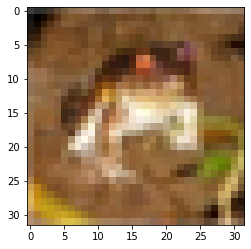

In [62]:
plt.figure()
plt.imshow(train_image[0])
plt.colorbar
plt.grid(False)
plt.show

In [63]:
train_image = rgb2gray(train_image)
test_image = rgb2gray(test_image)

C:\Users\jarai\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


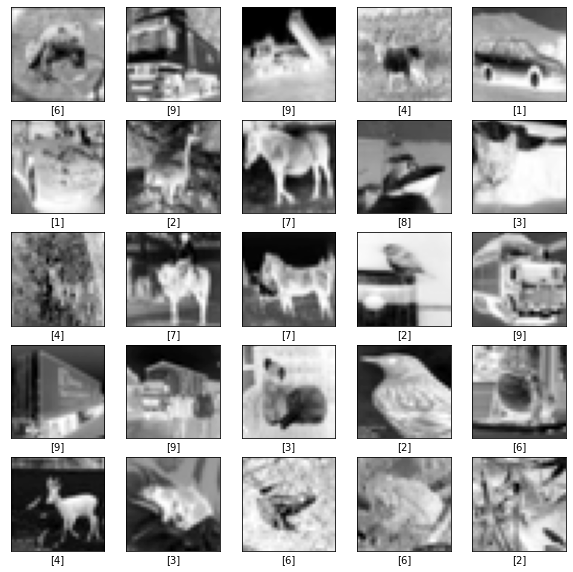

In [64]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_image[i], cmap= plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()


In [65]:
model = models.Sequential()
model.add(layers.Conv2D(filters= 8, kernel_size= (3,3), input_shape= (32,32,1)))
model.add(layers.MaxPooling2D(pool_size= (2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(32))
model.add(layers.Dense(10, activation= 'softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 8)         80        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 15, 15, 8)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1800)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                57632     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 58,042
Trainable params: 58,042
Non-trainable params: 0
__________________________________________________

In [66]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 2.

Entrena la red neuronal 1 pero esta vez con las imágenes a color.

In [67]:
train_image = train_image.reshape(50000, 32, 32, 1)
test_image = test_image.reshape(10000, 32, 32, 1)

In [69]:
model.fit(train_image, train_labels, epochs= 10)

Epoch 1/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.4382 - accuracy: 0.5049
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.4243 - accuracy: 0.5103
Epoch 3/10
1563/1563 [==============================] - 24s 16ms/step - loss: 1.4163 - accuracy: 0.5113
Epoch 4/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.4131 - accuracy: 0.5131
Epoch 5/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.4093 - accuracy: 0.5170
Epoch 6/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.4054 - accuracy: 0.5167
Epoch 7/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.3994 - accuracy: 0.5208
Epoch 8/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.3978 - accuracy: 0.5209
Epoch 9/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.3914 - accuracy: 0.5216
Epoch 10/10
1563/1563 [==============================] - 25s 16m

In [70]:
model2 = models.Sequential()
model2.add(layers.Conv2D(filters= 8, kernel_size= (3,3), input_shape= (32,32,1)))
model2.add(layers.MaxPooling2D(pool_size= (2,2)))
model2.add(layers.Dropout(0.25))
model2.add(layers.Flatten())
model2.add(layers.Dense(16))
model2.add(layers.Dense(32))
model2.add(layers.Dense(10, activation= 'softmax'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 8)         80        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 8)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1800)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 16)                28816     
_________________________________________________________________
dense_13 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_14 (Dense)             (None, 10)               

In [71]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [72]:
model2.fit(train_image, train_labels)

1563/1563 [==============================] - 33s 16ms/step - loss: 1.9411 - accuracy: 0.3010


In [74]:
predictions = model.predict(test_image)

In [85]:
predictions[0]

array([0.04766301, 0.00807519, 0.02222323, 0.10963116, 0.02960257,
       0.01460583, 0.5648796 , 0.06219058, 0.09020975, 0.05091902],
      dtype=float32)

In [80]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label), color= color)


In [82]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

TypeError: only integer scalar arrays can be converted to a scalar index

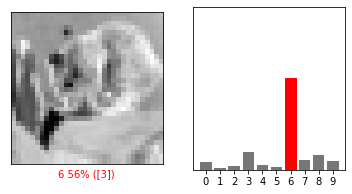

In [83]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_image)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()